In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
### Выгрузка информации из файла эксель с получением данных с каждого листа файла.

In [3]:
df_date = pd.read_excel('Новый диплом датасет (1).xlsx', sheet_name='Данные')

In [4]:
df_date

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000
...,...,...,...,...
38686,283582,185826.0,3702.0,2022-08-22 02:22:41.588000
38687,174414,187403.0,3284.0,2022-10-01 14:35:56.818000
38688,113060,184674.0,3708.0,2022-07-17 10:23:57.530000
38689,218517,208436.0,1983.0,2022-11-12 17:05:48.765000


In [5]:
df_date.dropna(inplace=True) 

In [6]:
df_clients = pd.read_excel('Новый диплом датасет (1).xlsx', sheet_name='Clients')

In [7]:
df_clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [8]:
df_clients.dropna(inplace=True)

In [9]:
df_regd = pd.read_excel('Новый диплом датасет (1).xlsx', sheet_name='Region_dict')

In [10]:
df_regd

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [11]:
df_regd_drop = df_regd.dropna() 

In [12]:
###Визуализация общего распределения торговых точек по городам.

In [13]:
df_regd_gr = df_regd_drop.groupby('city').count()['id_trading_point'].reset_index().sort_values (by = 'id_trading_point', ascending = False)

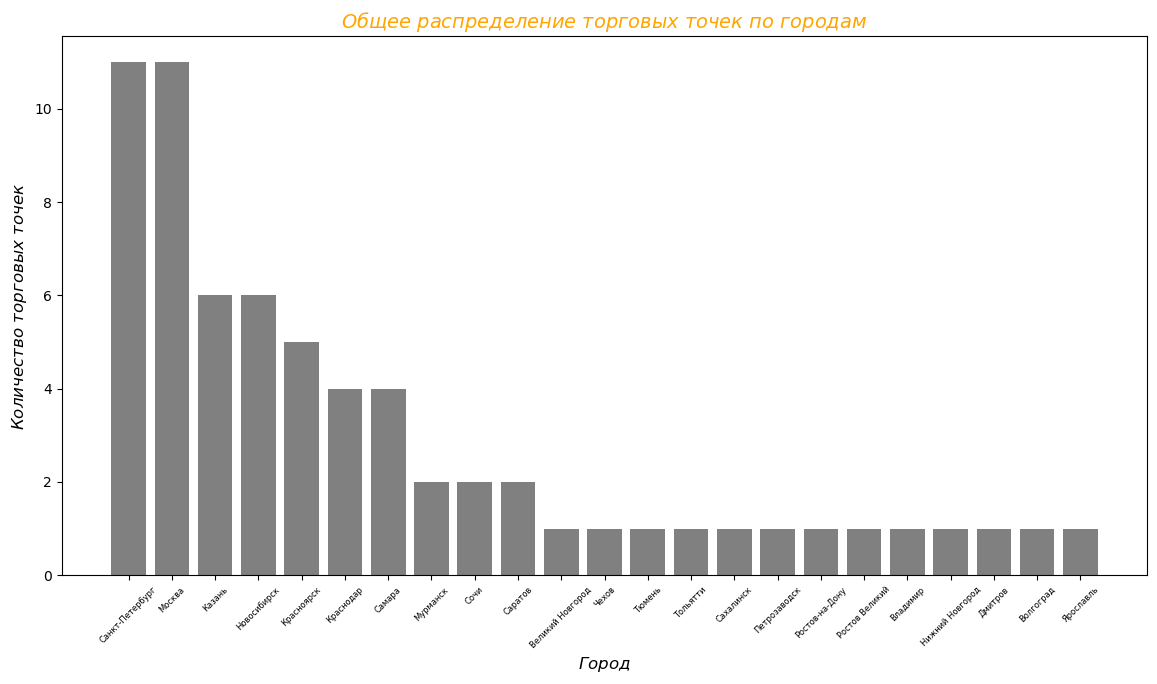

In [14]:
plt.figure(figsize=(14, 7))
plt.bar(df_regd_gr['city'], df_regd_gr['id_trading_point'], color='grey')
plt.xticks(rotation = 45, fontsize = 6)
plt.title('$Общее$ $распределение$ $торговых$ $точек$ $по$ $городам$', fontsize = 14, color= 'orange')
plt.xlabel('$Город$', fontsize = 12)
plt.ylabel('$Количество$ $торговых$ $точек$', fontsize = 12)
plt.show()

In [15]:
### Cуммирование оплаты по id_client, объединение таблиц, заполнение нулями несовершенных покупок, добавление флага об прохождении оплаты.

In [16]:
print(len(df_clients))
print(df_clients.nunique())

55356
id_client           55356
dtime_ad            55356
nflag_test              2
id_trading_point       66
dtype: int64


In [17]:
df_1_2 = df_date.merge(df_clients, on = 'id_client', how = 'outer')
df_3 = df_1_2.merge(df_regd_drop, on = 'id_trading_point')

In [18]:
df_sumpay = df_3.groupby(['id_client', 'id_trading_point', 'city']).agg({'id_order': 'count', 'amt_payment':'sum'}).reset_index()

In [19]:
df_sumpay

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [20]:
df_unific = df_sumpay.merge(df_clients[['id_client', 'dtime_ad', 'nflag_test' ]], on = 'id_client', how = 'outer')
df_unific

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1
...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0


In [21]:
df_unific['amt_payment'] = df_unific['amt_payment'].fillna(0)

In [22]:
df_unific

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1
...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0


In [23]:
df_unific['flag_payment'] = [1 if m > 0 else 0 for m in df_unific['amt_payment']]
df_unific

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,flag_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03 02:47:49.183,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03 02:51:21.878,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03 02:52:10.616,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03 02:53:10.089,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03 02:55:13.525,1,1
...,...,...,...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0,2022-07-15 10:07:09.632,1,0
55352,331950.0,1654.0,Москва,0,0.0,2022-07-18 03:10:18.517,1,0
55353,331954.0,544.0,Казань,0,0.0,2022-07-08 12:45:17.300,0,0
55354,331955.0,72.0,Сочи,0,0.0,2022-08-12 03:15:49.011,0,0


In [24]:
### df_unific.groupby('city').nunique()['id_trading_point'].reset_index().sort_values (by = 'id_trading_point', ascending = False)

In [25]:
### Автоматизация статистических вычислений

In [26]:
def test_calc(r1, r2, alpha = .05):
    s,p = ttest_ind(r1, r2)
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

In [27]:
def mann_whitney_func(r1, r2, alpha = .05):
    s,p = mannwhitneyu(r1, r2)
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p

In [28]:
### Чистка неверно заполненных точек

In [29]:
not_paid_trading_point = []
for i in df_unific['id_trading_point'].unique():
    df_unific_1 = df_unific[df_unific['id_trading_point']==i]
    control = df_unific_1[df_unific_1['nflag_test']==0] ['amt_payment'].sum()
    test = df_unific_1[df_unific_1['nflag_test']==1] ['amt_payment'].sum()
    if (control == 0) | (test == 0):
        not_paid_trading_point.append(i)
print(not_paid_trading_point)

[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [30]:
emptiness_trading_point = []
for i in df_unific['id_trading_point'].unique():  
    df_unific_1 = df_unific[df_unific['id_trading_point']==i]
    control_2 = df_unific_1[df_unific_1['nflag_test']==0] ['id_client'].count()
    test_2 = df_unific_1[df_unific_1['nflag_test']==1] ['id_client'].count()
    if (control_2 == 0) | (test_2 == 0):
        emptiness_trading_point.append(i)
print(emptiness_trading_point)

[739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


In [31]:
### Расчет общих результатов АБ Теста 

In [32]:
### Удаление строк с вышеполученными значениями

In [33]:
df_unific = df_unific[~df_unific['id_trading_point'].isin(not_paid_trading_point + emptiness_trading_point)]

<Figure size 1400x700 with 0 Axes>

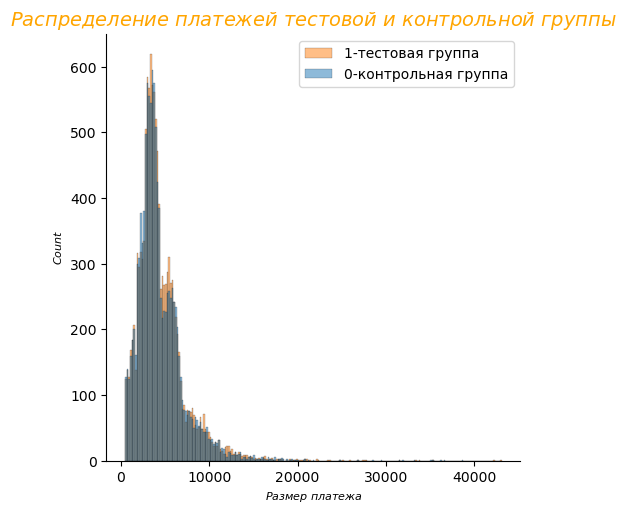

In [34]:
plt.figure(figsize=(14, 7))
sns.displot(df_unific[df_unific['amt_payment'] > 0], x = "amt_payment", hue = "nflag_test", legend= False)
plt.title('$Распределение$ $платежей$ $тестовой$ $и$ $контрольной$ $группы$', fontsize = 14, color= 'orange')
plt.xlabel('$Размер$ $платежа$', fontsize = 8)
plt.ylabel('$Count$', fontsize = 8)
plt.legend(['1-тестовая группа', '0-контрольная группа'])
plt.show()

In [35]:
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr

In [36]:
### Проверка по среднему чеку

In [37]:
test_calc(df_unific[df_unific['nflag_test']==1]['amt_payment'], df_unific[df_unific['nflag_test']==0]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2452.2773446201827
Среднее значение 2 ряда 2293.36610851222
Разница средних =  158.91123610796285
P_value =  1.488511135509387e-08


(5.663915722973564, 1.488511135509387e-08)

In [38]:
### Проверка конверсии в платеж

In [39]:
test_calc(df_unific[df_unific['nflag_test']==1]['flag_payment'], df_unific[df_unific['nflag_test']==0]['flag_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5432835820895522
Среднее значение 2 ряда 0.5180780833296901
Разница средних =  0.02520549875986211
P_value =  7.604318948190198e-08


(5.377160738040539, 7.604318948190198e-08)

In [40]:
### Расчет критерия Манна-Уитни

In [41]:
mann_whitney_func(df_unific[df_unific['nflag_test']==1]['amt_payment'], df_unific[df_unific['nflag_test']==0]['amt_payment'])

Распределения не равны
P_value =  1.246458969497137e-09


(264700600.0, 1.246458969497137e-09)

In [42]:
### Сегментация по городам

In [43]:
### Распределение платежей по Москве

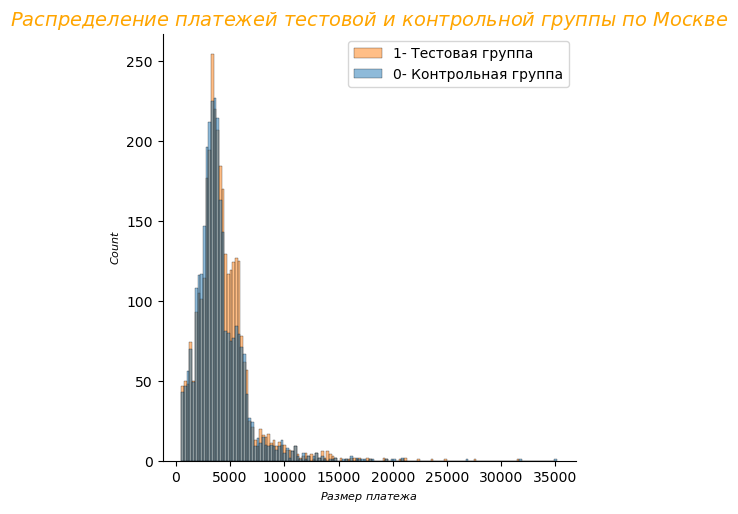

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2367.9590805347243
Среднее значение 2 ряда 1986.18059125964
Разница средних =  381.7784892750842
P_value =  1.757549439555765e-14
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5435278774046299
Среднее значение 2 ряда 0.4879498714652956
Разница средних =  0.05557800593933432
P_value =  6.194689260032549e-10



In [44]:
df_moscow=df_unific[df_unific['city']=='Москва']
sns.displot(df_moscow[df_moscow['amt_payment']>0], x= 'amt_payment', hue= 'nflag_test', legend= False)
plt.title('$Распределение$ $платежей$ $тестовой$ $и$ $контрольной$ $группы$ $по$ $Москве$', fontsize = 14, color= 'orange')
plt.xlabel('$Размер$ $платежа$', fontsize = 8)
plt.ylabel('$Count$', fontsize = 8)
plt.legend(['1- Тестовая группа', '0- Контрольная группа'])
plt.show()

test_calc(df_moscow[df_moscow['nflag_test']==1]['amt_payment'],df_moscow[df_moscow['nflag_test']==0]['amt_payment'])
test_calc(df_moscow[df_moscow['nflag_test']==1]['flag_payment'],df_moscow[df_moscow['nflag_test']==0]['flag_payment'])
print()

In [45]:
### Распределение платежей по Санкт-Петербургу

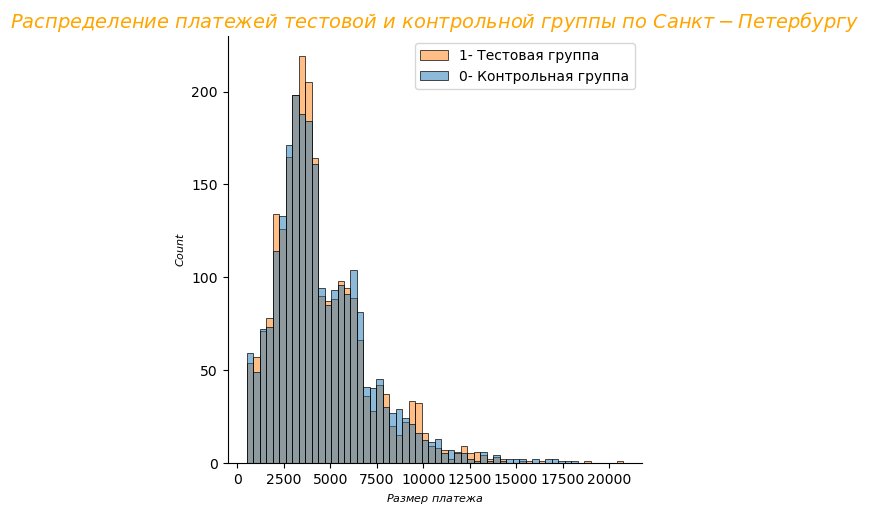

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2427.462542182227
Среднее значение 2 ряда 2450.964140730717
Разница средних =  -23.501598548490165
P_value =  0.7030554040209538
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5471316085489314
Среднее значение 2 ряда 0.542850699142986
Разница средних =  0.004280909405945388
P_value =  0.6854986692744592



In [46]:
df_spb=df_unific[df_unific['city']=='Санкт-Петербург']
sns.displot(df_spb[df_spb['amt_payment']>0], x= 'amt_payment', hue= 'nflag_test', legend= False)
plt.title('$Распределение$ $платежей$ $тестовой$ $и$ $контрольной$ $группы$ $по$ $Санкт-Петербургу$', fontsize = 14, color= 'orange')
plt.xlabel('$Размер$ $платежа$', fontsize = 8)
plt.ylabel('$Count$', fontsize = 8)
plt.legend(['1- Тестовая группа', '0- Контрольная группа'])
plt.show()

test_calc(df_spb[df_spb['nflag_test']==1]['amt_payment'],df_spb[df_spb['nflag_test']==0]['amt_payment'])
test_calc(df_spb[df_spb['nflag_test']==1]['flag_payment'],df_spb[df_spb['nflag_test']==0]['flag_payment'])
print()

In [47]:
### Сегментация по другим городам

In [48]:
cities = list(df_unific['city'].unique())

Саратов



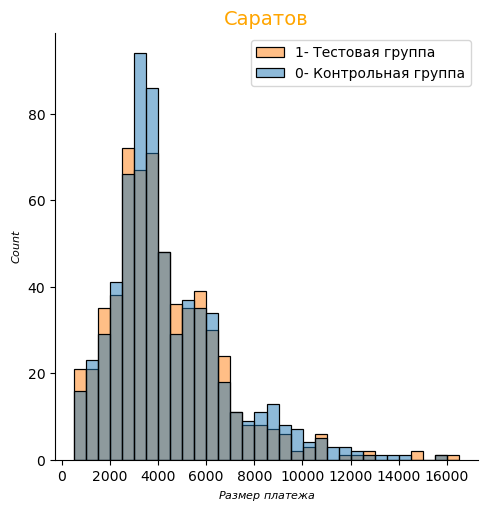

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2528.7887462981244
Среднее значение 2 ряда 2541.6456266907126
Разница средних =  -12.85688039258821
P_value =  0.9162512798549167
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5883514313919053
Среднее значение 2 ряда 0.5743913435527502
Разница средних =  0.013960087839155033
P_value =  0.5152558091282406

Тольятти



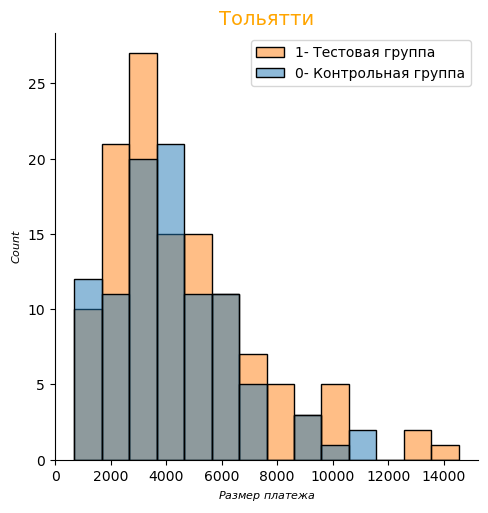

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2902.4105263157894
Среднее значение 2 ряда 2439.4610778443116
Разница средних =  462.9494484714778
P_value =  0.1333273246710206
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.6421052631578947
Среднее значение 2 ряда 0.5808383233532934
Разница средних =  0.061266939804601295
P_value =  0.2367531179978554

Владимир



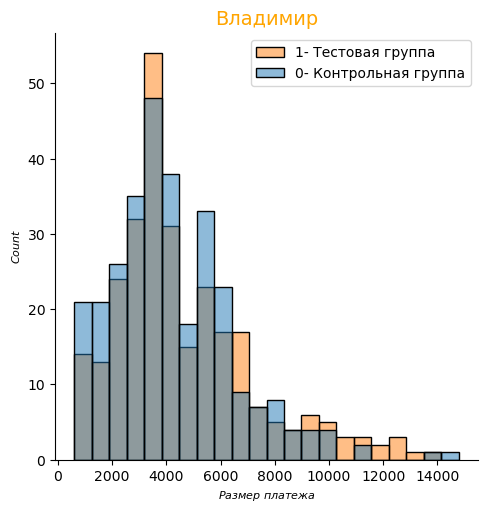

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2547.2200392927307
Среднее значение 2 ряда 2108.6101973684213
Разница средних =  438.6098419243094
P_value =  0.010095112170351712
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.550098231827112
Среднее значение 2 ряда 0.49835526315789475
Разница средних =  0.05174296866921729
P_value =  0.08481593543159477

Мурманск



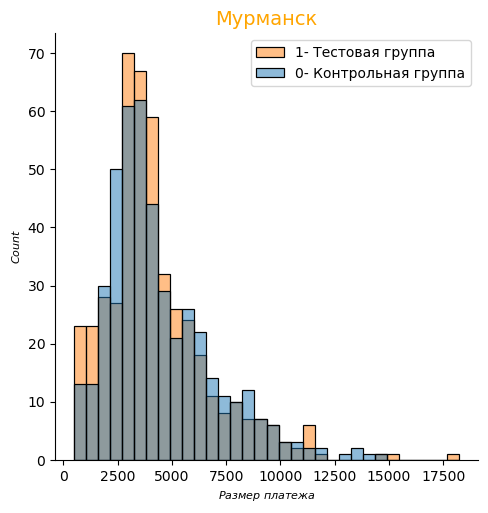

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1865.2710900473933
Среднее значение 2 ряда 1857.2197183098592
Разница средних =  8.051371737534055
P_value =  0.9449762446327565
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4369668246445498
Среднее значение 2 ряда 0.4187793427230047
Разница средних =  0.018187481921545068
P_value =  0.3976422846466432

Красноярск



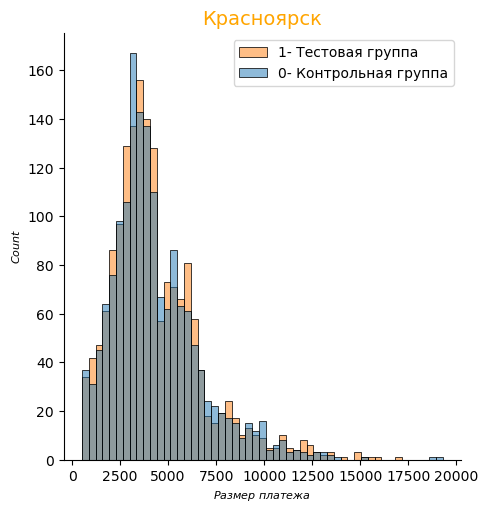

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2437.4958840961476
Среднее значение 2 ряда 2428.7775862068966
Разница средних =  8.718297889251062
P_value =  0.9044823881233125
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5577872900889035
Среднее значение 2 ряда 0.5613793103448276
Разница средних =  -0.003592020255924089
P_value =  0.7805336501430107

Казань



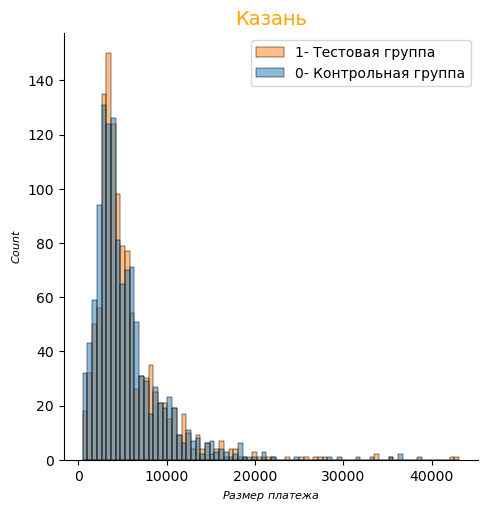

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2731.9132
Среднее значение 2 ряда 2610.688397361273
Разница средних =  121.22480263872694
P_value =  0.286688049247618
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4788
Среднее значение 2 ряда 0.47497089639115253
Разница средних =  0.003829103608847473
P_value =  0.784829789025573

Самара



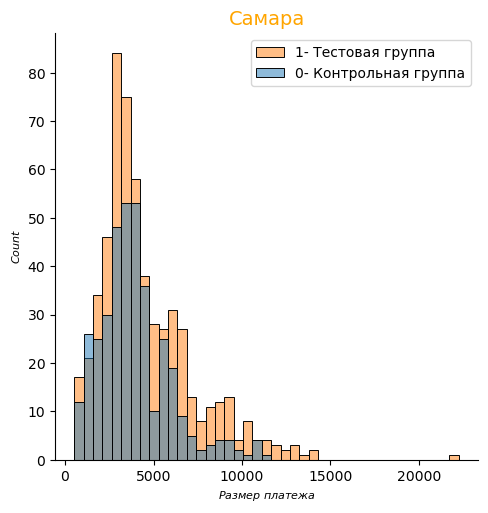

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 3262.78927680798
Среднее значение 2 ряда 1718.4172576832152
Разница средних =  1544.3720191247648
P_value =  1.1014020778472052e-29
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.7169576059850374
Среднее значение 2 ряда 0.4397163120567376
Разница средних =  0.2772412939282998
P_value =  3.981449742682522e-31

Волгоград



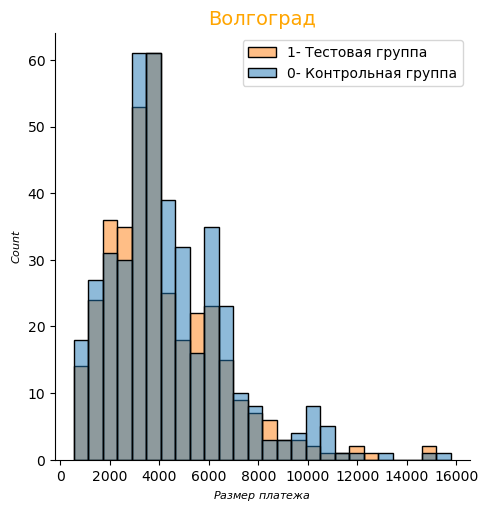

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2288.8706240487063
Среднее значение 2 ряда 2601.7610241820767
Разница средних =  -312.89040013337035
P_value =  0.03686899928098654
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5525114155251142
Среднее значение 2 ряда 0.5960170697012802
Разница средних =  -0.04350565417616603
P_value =  0.10498894497258296

Сочи



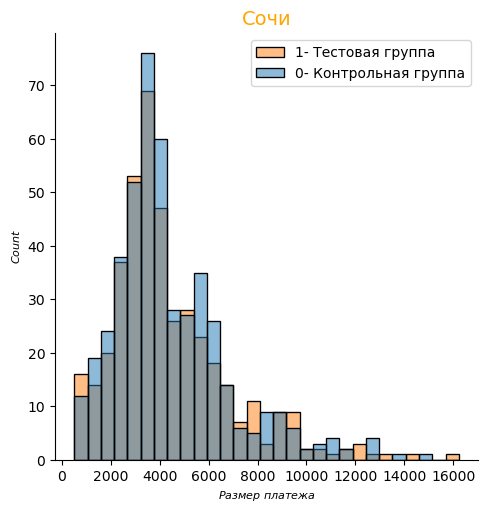

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2305.8304020100504
Среднее значение 2 ряда 2523.081885856079
Разница средних =  -217.2514838460288
P_value =  0.12297605685687794
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5251256281407035
Среднее значение 2 ряда 0.5744416873449132
Разница средних =  -0.04931605920420967
P_value =  0.047319885252583245

Краснодар



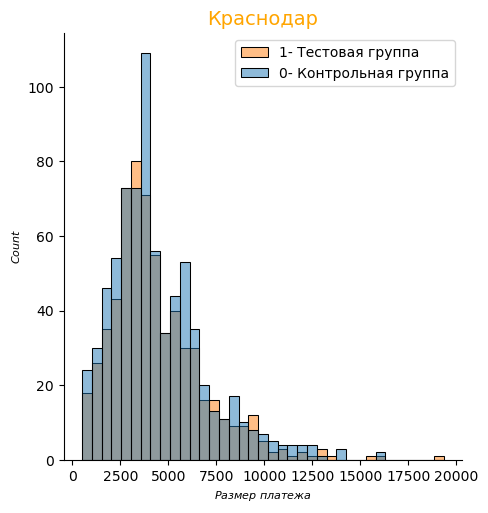

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2696.8046875
Среднее значение 2 ряда 2912.4310798946444
Разница средних =  -215.62639239464443
P_value =  0.085800112916198
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.6142578125
Среднее значение 2 ряда 0.6532045654082529
Разница средних =  -0.03894675290825289
P_value =  0.060385275678499745

Дмитров



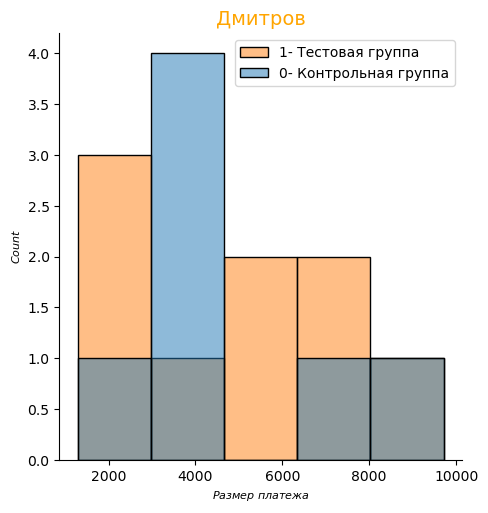

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 579.3333333333334
Среднее значение 2 ряда 483.4507042253521
Разница средних =  95.88262910798124
P_value =  0.7410763125801646
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.11538461538461539
Среднее значение 2 ряда 0.09859154929577464
Разница средних =  0.01679306608884075
P_value =  0.7429421277261778

Тюмень



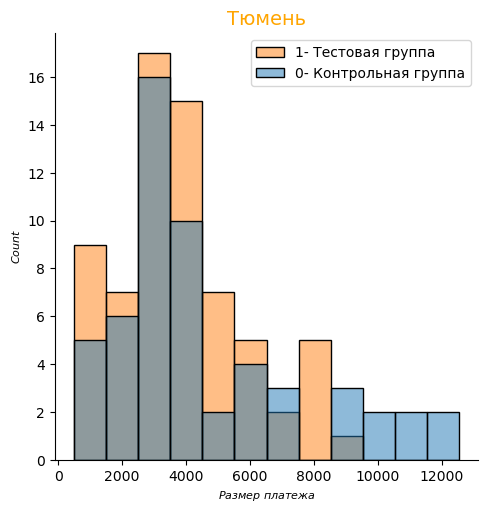

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2043.823076923077
Среднее значение 2 ряда 1743.376712328767
Разница средних =  300.4463645943099
P_value =  0.3550227648604757
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5230769230769231
Среднее значение 2 ряда 0.3767123287671233
Разница средних =  0.1463645943097998
P_value =  0.01451825932213329

Сахалинск



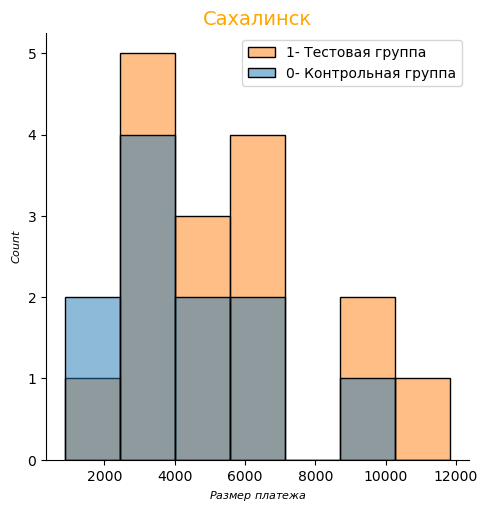

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1171.4533333333334
Среднее значение 2 ряда 600.1538461538462
Разница средних =  571.2994871794872
P_value =  0.105809212549273
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.21333333333333335
Среднее значение 2 ряда 0.14102564102564102
Разница средних =  0.07230769230769232
P_value =  0.2436724740693643



In [49]:
df_city= []
for i in cities:
    if i not in ['Москва', 'Санкт-Петербург']:
        df_city = df_unific[df_unific['city']==i]
        print(i)
        print()
        sns.displot(df_city[df_city['amt_payment'] > 0], x = 'amt_payment', hue = 'nflag_test', legend= False)
        plt.title(i, fontsize = 14, color= 'orange')
        plt.xlabel('$Размер$ $платежа$', fontsize = 8)
        plt.ylabel('$Count$', fontsize = 8)
        plt.legend(['1- Тестовая группа', '0- Контрольная группа'])
        plt.show()
        test_calc(df_city[df_city['nflag_test']==1]['amt_payment'], df_city[df_city['nflag_test']==0]['amt_payment'])
        test_calc(df_city[df_city['nflag_test']==1]['flag_payment'], df_city[df_city['nflag_test']==0]['flag_payment'])       
        print()

In [52]:
### Отчет по АБ Тесту. Создание датафрейма

In [53]:
df_results = pd.DataFrame()
for i in  cities:
    df_loc_loc = df_unific[df_unific['city'] == i]

    for e in df_loc_loc['id_trading_point'].unique():
        df_loc_all = df_loc_loc[df_loc_loc['id_trading_point'] == e]
         
        count_test = len(df_loc_all[df_loc_all['nflag_test'] == 1])
        count_control = len(df_loc_all[df_loc_all ['nflag_test']==0]) 
        count_all = count_test + count_control
        sigma_test = df_loc_all[df_loc_all['nflag_test'] == 1]['amt_payment'].std()
        sigma_control = df_loc_all[df_loc_all['nflag_test'] == 0]['amt_payment'].std()   
        avg_payment_test = np.mean(df_loc_all[df_loc_all['nflag_test'] == 1]['amt_payment']) 
        avg_payment_control = np.mean(df_loc_all[df_loc_all['nflag_test'] == 0]['amt_payment'])
        diff = avg_payment_test - avg_payment_control   
        s,p = test_calc(df_loc_all[df_loc_all['nflag_test'] == 1]['amt_payment'], df_loc_all[df_loc_all['nflag_test'] == 0]['amt_payment'])
        p_ttest_s = test_calc(df_loc_all[df_loc_all['nflag_test'] == 1]['flag_payment'], df_loc_all[df_loc_all['nflag_test'] == 0]['flag_payment'])
        print()
        print('Торговая точка №', e)
        df_results = df_results.append({'city':i, 'id_trading_point':e
                                      ,'count_test':count_test, 'count_control':count_control, 'count_all':count_all 
                                      ,'avg_payment_test':avg_payment_test, 'avg_payment_control':avg_payment_control
                                      ,'diff': diff ,'sigma_test':sigma_test, 'sigma_control':sigma_control
                                      ,'ttest':s, 'pvalue_ttest': p, }, ignore_index = True)

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2501.966228893058
Среднее значение 2 ряда 2420.415633937083
Разница средних =  81.55059495597516
P_value =  0.5240386192152271
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5562851782363978
Среднее значение 2 ряда 0.540514775977121
Разница средних =  0.015770402259276728
P_value =  0.46643637357497736

Торговая точка № 453.0
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2488.115030674847
Среднее значение 2 ряда 2776.2415812591507
Разница средних =  -288.1265505843039
P_value =  0.07215173668770118
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5766871165644172
Среднее значение 2 ряда 0.6046852122986823
Разница средних =  -0.02799809573426515
P_value =  0.29865574176722437

Торговая точка № 112.0
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2582.2976
Среднее значение 2 ряда 2592.0868824531517
Разница средних =  -9.789282453151827
P_value =

C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_

Разница средних =  -0.01797857475547282
P_value =  0.5318451364327887

Торговая точка № 202.0
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2404.106153846154
Среднее значение 2 ряда 2545.73487544484
Разница средних =  -141.62872159868584
P_value =  0.3808017001028422
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.556923076923077
Среднее значение 2 ряда 0.5782918149466192
Разница средних =  -0.021368738023542222
P_value =  0.45446298978722766

Торговая точка № 444.0
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2499.345794392523
Среднее значение 2 ряда 2185.2147239263804
Разница средних =  314.1310704661428
P_value =  0.06901056074583502
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5532710280373832
Среднее значение 2 ряда 0.5276073619631901
Разница средних =  0.025663666074193014
P_value =  0.4108986349888111

Торговая точка № 278.0
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2259.6

C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({'city':i, 'id_trading_point':e
C:\Users\Галя\AppData\Local\Temp\ipykernel_13788\3185315624.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_

In [54]:
df_results['percent_count'] = (df_results['count_all'] / df_results['count_all'].sum())

In [55]:
df_results

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,5.240386e-01,0.046670
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,7.215174e-02,0.029458
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,9.519316e-01,0.026744
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,2.705641e-01,0.010548
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,2.799008e-01,0.028399
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,4.939479e-01,0.014917
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,6.440239e-01,0.010746
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,8.435623e-01,0.009643
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,4.591805e-02,0.007436
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,7.006710e-01,0.007194


In [56]:
df_results['nflag_diff'] = np.where((df_results['pvalue_ttest'] < .05) & (df_results['diff'] > 0), 'Positive'
                                   , np.where((df_results['pvalue_ttest'] < .05) & (df_results['diff'] < 0), 'Negative', 'No Diff'))

In [57]:
df_results

,city,id_trading_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,nflag_diff
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,2420.415634,81.550595,2993.442540,2890.088044,0.637238,5.240386e-01,0.046670,No Diff
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2776.241581,-288.126551,2778.179183,3057.040898,-1.799588,7.215174e-02,0.029458,No Diff
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2592.086882,-9.789282,2835.004503,2813.867330,-0.060294,9.519316e-01,0.026744,No Diff
3,Санкт-Петербург,309.0,240,238,478,2706.279167,3003.789916,-297.510749,2814.939849,3077.161555,-1.103047,2.705641e-01,0.010548,No Diff
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1760.296804,-165.860296,2683.727211,2815.093171,-1.080998,2.799008e-01,0.028399,No Diff
5,Санкт-Петербург,900.0,335,341,676,2450.991045,2299.768328,151.222716,2865.607356,2878.774167,0.684416,4.939479e-01,0.014917,No Diff
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2857.058824,120.570487,2905.494362,2845.245598,0.462369,6.440239e-01,0.010746,No Diff
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2980.155660,-55.013438,2774.292063,3049.074475,-0.197457,8.435623e-01,0.009643,No Diff
8,Санкт-Петербург,573.0,177,160,337,2929.045198,2252.350000,676.695198,3201.098137,2975.544726,2.003598,4.591805e-02,0.007436,Positive
9,Санкт-Петербург,891.0,159,167,326,2618.949686,2495.455090,123.494596,2899.782464,2893.862408,0.384755,7.006710e-01,0.007194,No Diff


In [59]:
writer = pd.ExcelWriter("Анализ данных(калькулятор) Титова Г.Н.xlsx", engine="xlsxwriter")
df_results[df_results['nflag_diff']== 'Positive'].to_excel(writer, sheet_name='Положительные исходы', index = False)
df_results[df_results['nflag_diff']== 'Negative'].to_excel(writer, sheet_name='Отрицательные исходы', index = False)
df_results[df_results['nflag_diff']== 'No Diff'].to_excel(writer, sheet_name='Нейтральные исходы', index = False)
writer.close()